In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Zadanie 3

In [2]:
ug = np.random.uniform

def rzut(p, a, b):
    return (a+1, b-1) if (1-p < ug()) else (a-1, b+1)

In [3]:
def gra(p, a, b):
    while (a > 0 and b > 0):
        a, b = rzut(p, a, b)
    return (a, b)

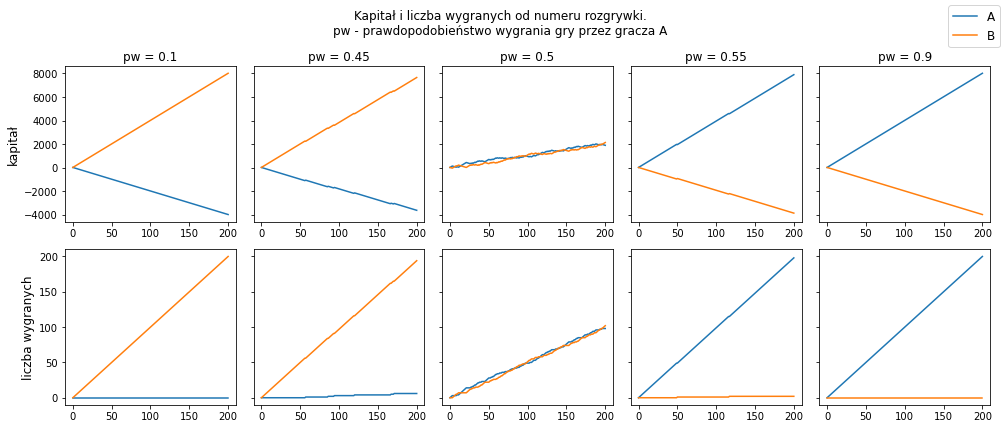

In [4]:
ilosc_gier = 200
kapital_poczatkowy = 20
ps = [0.1, 0.45, 0.5, 0.55, 0.9]

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14,6), sharey='row')

for p_idx, p in enumerate(ps):
    wygrane_a = [0]
    wygrane_b = [0]
    kapitaly = [(20, 20)]
    for i in range(ilosc_gier):
        a, b = kapital_poczatkowy, kapital_poczatkowy
        a, b = gra(p, a, b)
        if (a > 0):
            kapital_a = kapitaly[-1][0] + a
            kapital_b = kapitaly[-1][1] - kapital_poczatkowy
            kapitaly.append((kapital_a, kapital_b))
            wygrane_a.append(wygrane_a[-1]+1)
            wygrane_b.append(wygrane_b[-1])
        else:
            kapital_a = kapitaly[-1][0] - kapital_poczatkowy
            kapital_b = kapitaly[-1][1] + b
            kapitaly.append((kapital_a, kapital_b))
            wygrane_a.append(wygrane_a[-1])
            wygrane_b.append(wygrane_b[-1]+1)

    axes[0, p_idx].plot(range(ilosc_gier+1), [kapital[0] for kapital in kapitaly], label='A')
    axes[0, p_idx].plot(range(ilosc_gier+1), [kapital[1] for kapital in kapitaly], label='B')
    axes[1, p_idx].plot(range(ilosc_gier+1), wygrane_a, label='A')
    axes[1, p_idx].plot(range(ilosc_gier+1), wygrane_b, label='B')
    
fig.suptitle("Kapitał i liczba wygranych od numeru rozgrywki.\npw - prawdopodobieństwo wygrania gry przez gracza A", fontsize='large')
rows = ["kapitał", "liczba wygranych"]
for ax, p in zip(axes[0], ps):
    ax.set_title("pw = {}".format(p))

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, size='large')
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc='upper right', fontsize='large')
plt.tight_layout()
plt.savefig("zadanie3.png", facecolor='white')
plt.show()

## Zadanie 4.

In [5]:
def r_analityczne(p, a, b):
    z = a+b
    if (p == 1/2):
        return b/z
    q = 1-p
    return (1-(p/q)**b) / (1-(p/q)**z)

In [6]:
zestawy = [(a, 100-a) for a in range(1, 100)]
ps = [0.1, 0.45, 0.5, 0.55, 0.9]
liczba_gier = 100
prawdopodobienstwo = dict.fromkeys(ps)

for p in ps:
    print("Obliczanie dla p={}".format(p))
    prawdopodobienstwo[p] = []
    for a, b in zestawy:
        przegranych = 0
        for _ in range(liczba_gier):
            _a, _b = gra(p, a, b)
            if (_a == 0):
                przegranych += 1
        prawdopodobienstwo[p].append(przegranych/liczba_gier)


Obliczanie dla p=0.1
Obliczanie dla p=0.45
Obliczanie dla p=0.5
Obliczanie dla p=0.55
Obliczanie dla p=0.9


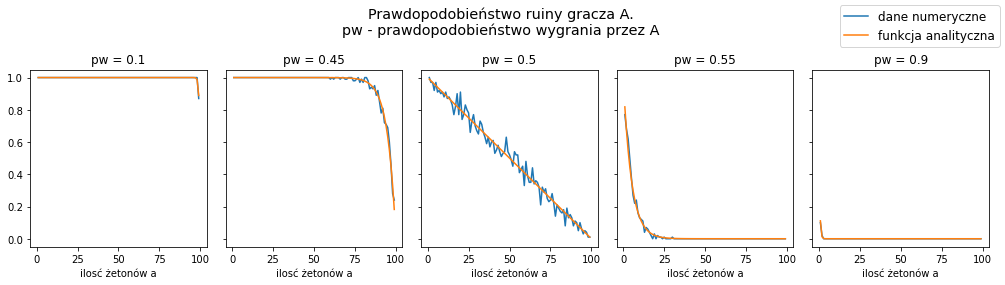

In [7]:
fig, axes = plt.subplots(ncols=5, figsize=(14, 4), sharey='row')
plt.subplots_adjust(top=0.76)
fig.suptitle("Prawdopodobieństwo ruiny gracza A.\npw - prawdopodobieństwo wygrania przez A", fontsize='x-large')

for ax, p in zip(axes, ps):
    ax.set_title("pw = {}".format(p))
    X = range(1, 100)
    Y = prawdopodobienstwo[p]
    ax.plot(X, Y, label='dane numeryczne')
    Y = [r_analityczne(p, a, 100-a) for a in range(1, 100)]
    ax.plot(range(1, 100), Y, label='funkcja analityczna')
    ax.xaxis.set_label_text("ilosć żetonów a")

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc='upper right', fontsize='large')
fig.tight_layout()
plt.savefig("zadanie4.png", facecolor='white')
plt.show()

## Zadanie 5

In [8]:
ps = [0.2, 0.5, 0.8]
liczba_gier = 10000
a = b = 20

def dlugosc_rozgrywki(p, a, b):
    liczba_rzutow = 0
    while (a > 0 and b > 0):
        a, b = rzut(p, a, b)
        liczba_rzutow += 1
    return liczba_rzutow

liczba_rozgrywek = dict.fromkeys(ps)
for p in ps:
    print("Obliczanie dla p={}".format(p))
    liczba_rozgrywek[p] = [dlugosc_rozgrywki(p, a, b) for _ in range(liczba_gier)]

Obliczanie dla p=0.2
Obliczanie dla p=0.5
Obliczanie dla p=0.8


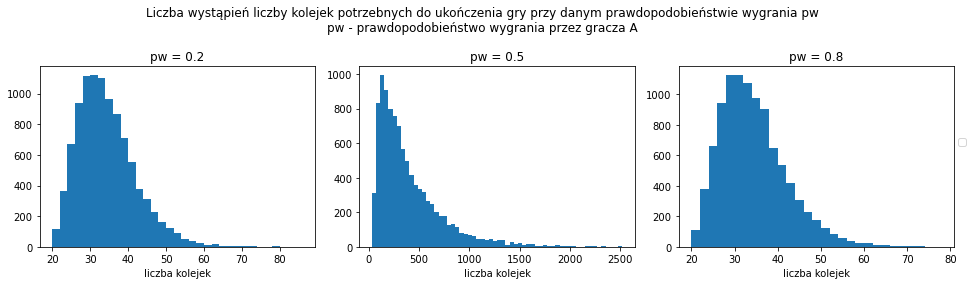

In [9]:
fig, axes = plt.subplots(ncols=len(ps), figsize=(len(ps)*4.5, 4))
fig.suptitle("Liczba wystąpień liczby kolejek potrzebnych do ukończenia gry przy danym prawdopodobieństwie wygrania pw"
             + "\npw - prawdopodobieństwo wygrania przez gracza A", fontsize='large')

for ax, p in zip(axes, ps):
    bins = (max(liczba_rozgrywek[p]) - min(liczba_rozgrywek[p])) // 2
    if (bins > 80):
        bins = 60
    ax.set_title("pw = {}".format(p))
    ax.hist(liczba_rozgrywek[p], bins=bins)
    ax.xaxis.set_label_text("liczba kolejek")

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'center right')
fig.tight_layout()
plt.savefig("zadanie5.png", facecolor='white')
plt.show()

## Zadanie 8

In [10]:
kapitaly = [5, 20, 100]
probek = 100
ps = np.linspace(0.0, 1.0, probek)
liczba_gier = 1000

p_od_kapitalu = dict.fromkeys(kapitaly)
for kapital_idx, kapital in enumerate(kapitaly):
    print("--- Kapitał={}, {}. z {}".format(kapital, kapital_idx+1, len(kapitaly)))
    p_od_kapitalu[kapital] = dict.fromkeys(ps)
    for pw_idx, pw in enumerate(ps):
        if ((pw_idx)%10==0 or pw_idx==len(ps)-1):
            print("Próbka {}. z {}".format(pw_idx+1, probek))
        p_od_kapitalu[kapital][pw] = []
        przegranych = 0
        for _ in range(liczba_gier):
            a, b = gra(pw, kapital, kapital)
            if (a == 0):
                przegranych += 1
        p_od_kapitalu[kapital][pw].append(przegranych/liczba_gier)

--- Kapitał=5, 1. z 3
Próbka 1. z 100
Próbka 11. z 100
Próbka 21. z 100
Próbka 31. z 100
Próbka 41. z 100
Próbka 51. z 100
Próbka 61. z 100
Próbka 71. z 100
Próbka 81. z 100
Próbka 91. z 100
Próbka 100. z 100
--- Kapitał=20, 2. z 3
Próbka 1. z 100
Próbka 11. z 100
Próbka 21. z 100
Próbka 31. z 100
Próbka 41. z 100
Próbka 51. z 100
Próbka 61. z 100
Próbka 71. z 100
Próbka 81. z 100
Próbka 91. z 100
Próbka 100. z 100
--- Kapitał=100, 3. z 3
Próbka 1. z 100
Próbka 11. z 100
Próbka 21. z 100
Próbka 31. z 100
Próbka 41. z 100
Próbka 51. z 100
Próbka 61. z 100
Próbka 71. z 100
Próbka 81. z 100
Próbka 91. z 100
Próbka 100. z 100


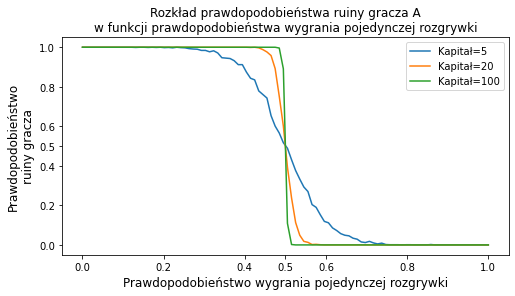

In [11]:
plt.figure(figsize=(8, 4))
plt.title("Rozkład prawdopodobieństwa ruiny gracza A"
          + "\nw funkcji prawdopodobieństwa wygrania pojedynczej rozgrywki")
plt.xlabel("Prawdopodobieństwo wygrania pojedynczej rozgrywki", fontsize=12)
plt.ylabel("Prawdopodobieństwo\nruiny gracza", fontsize=12)

plt.xticks(list(plt.xticks()[0]) + [0.5])
plt.yticks(list(plt.yticks()[0]) + [0.5])

for kapital in kapitaly:
    plt.plot(ps, p_od_kapitalu[kapital].values(), label="Kapitał={}".format(kapital))
    
plt.legend()
plt.savefig("zadanie8.png", facecolor='white')
plt.show()